In [3]:
# To handle data in form of rows and columns
import pandas as pd

# Numerical libraries
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

#implements serialization
import pickle


In [ ]:
from google.colab import files
files.upload()


Saving Folds5x2_pp.ods to Folds5x2_pp.ods


{'Folds5x2_pp.ods': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x00\x00!\x00\x85l9\x8a.\x00\x00\x00.\x00\x00\x00\x08\x00\x00\x00mimetypeapplication/vnd.oasis.opendocument.spreadsheetPK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xd8\x93\xe0\xb8\xd3v$\x00\t\xbf1\x02\x0b\x00\x00\x00content.xml\xe4}]\x93\\\xb7\x92\xdc\xbb#\xfc\x1f\x14|\x9ffw\x1f\xf4\x17C\xd2\xc6\x86\xbd\x0e?96\xec\xb5\xdfG\xc3\xa64\xb1C\x0ecfx%\xfd{g%0d\x8f\xae\xe8\xcaZo^"\xf6\xea\xc1\xbe+\xe5\x99N\x00\t\xa0P\xa8*|\xff\x0f\xbf\xbd\xbf\xfb\xee/\xe7\x87\xc7\xdb\xfb\x0f?\xbc\xda\xac\xd6\xaf\xbe;\x7f\xb8\xb9\x7f{\xfb\xe1\xe7\x1f^\xfd\xef\x7f\xf9oW\xc7W\xdf=>]\x7fx{}w\xff\xe1\xfc\xc3\xab\xdf\xcf\x8f\xaf\xfe\xe1\xc7\xff\xfc\x9f\xbe\xbf\x7f\xf7\xee\xf6\xe6\xfc\xe6\xed\xfd\xcd\xa7\xf7\xe7\x0fOW7\xf7\x1f\x9e\xf0\xff\x7f\x87\xbf\xf7\xe1\xf1\xcd\xd3\xf5Ow@\x7fz\xf8\xf0\xe6\xfe\xfa\xf1\xf6\xf1\xcd\x87\xeb\xf7g\xfc\xeb\x9b7\xf7\x1f\xcf\x1f\x9e?zs\x01~\xc3\xdf\xee\xff\xa2\xffm\xf5\xf3\xc1\xe4\xe2\xfb\xa7\xf3oO\xea\xd7\x81\xbd\xfc\xed\xc7\xa7\x

In [4]:
!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=3818a04f34e6dc32fd226a36f28e3e9add85a4f3382af4be83d4a09145bc2ead
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [5]:
data = pd.read_excel("Folds5x2_pp.ods", header=0 , names = ['AT','V','AP','RH','PE'])

In [6]:
print(data.isnull().sum())
print(data.head())
print(data.describe().T)

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
     count         mean        std     min        25%       50%      75%  \
AT  9568.0    19.651231   7.452473    1.81    13.5100    20.345    25.72   
V   9568.0    54.305804  12.707893   25.36    41.7400    52.080    66.54   
AP  9568.0  1013.259078   5.938784  992.89  1009.1000  1012.940  1017.26   
RH  9568.0    73.308978  14.600269   25.56    63.3275    74.975    84.83   
PE  9568.0   454.365009  17.066995  420.26   439.7500   451.550   468.43   

        max  
AT    37.11  
V     81.56  
AP  1033.30  
RH   100.16  
PE   495.76  


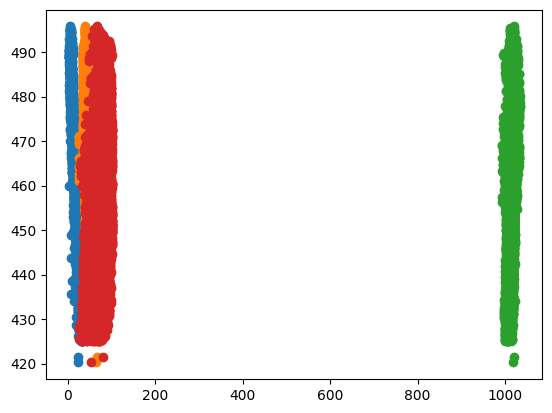

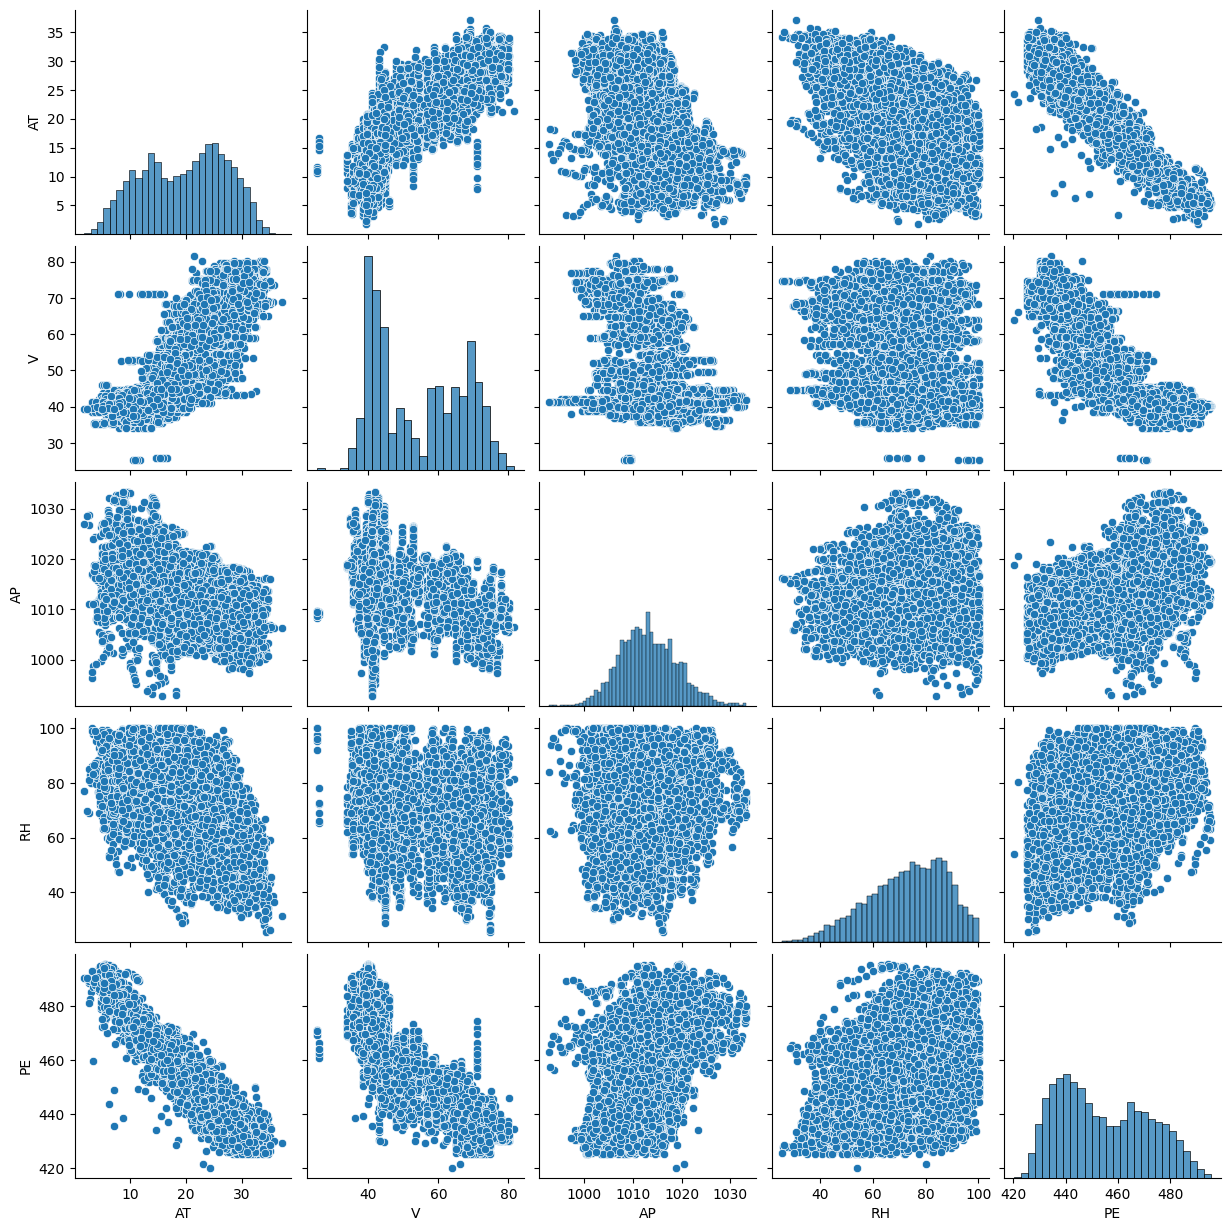

In [7]:
plt.scatter(data['AT'],data['PE'])
plt.scatter(data['V'],data['PE'])
plt.scatter(data['AP'],data['PE'])
plt.scatter(data['RH'],data['PE'])
sns.pairplot(data,diag_kind = 'hist')

In [8]:
x = data.drop(['PE'],axis=1)
y = data['PE']

In [9]:
from sklearn.model_selection import train_test_split
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape
print(x_train.shape)
xtest.shape
print(xtest.shape)

(7654, 4)
(1914, 4)


In [10]:
# Import the machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Initializing the models
LRmodel=LinearRegression()
DTmodel=DecisionTreeRegressor()
RFmodel=RandomForestRegressor()
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(x_train, y_train)
print(LRmodel.fit(x_train, y_train))
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor()
DTRmodel.fit(x_train, y_train)
print(DTRmodel.fit(x_train, y_train))
from sklearn.ensemble import RandomForestRegressor
RFmodel = DecisionTreeRegressor()
RFmodel.fit(x_train, y_train)
print(RFmodel.fit(x_train, y_train))

LinearRegression()
DecisionTreeRegressor()
DecisionTreeRegressor()


In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Initializing the model
LRmodel = LinearRegression()
# Train the data with Linear Regreesion model
LRmodel.fit(x_train, y_train)
LinearRegression()
LRpred=LRmodel.predict(xtest)
# Importing R Square Library
from sklearn.metrics import r2_score
# Checking for accuracy score with actual data and predicted data
LRscore=r2_score(ytest, LRpred)
LRscore
print(LRscore)

0.9325315554761302


In [12]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
# Initializing the model
DTRmodel = DecisionTreeRegressor()
# Train the data with Linear Regreesion model
DTRmodel.fit(x_train, y_train)
DecisionTreeRegressor()
DTRpred=DTRmodel.predict(xtest)
# Importing R Square Library
DTRscore=r2_score(ytest, DTRpred)
DTRscore
print(DTRscore)

0.9214468160975291


In [13]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
RFmodel = RandomForestRegressor()
RFmodel.fit(x_train, y_train)
RandomForestRegressor()
RFpred=RFmodel.predict(xtest)
# Importing R Square Library
RFscore=r2_score(ytest, RFpred)
RFscore
print(RFscore)

0.9647776895633485


In [14]:
pickle.dump(RFmodel, open('CCPP.pkl','wb'))